# Проект для «Викишоп» c BERT #

# Содержание #
<div>
    <ol>
        <li>
            <a href="#project">Проект для «Викишоп»</a>
        </li>
        <ul>
            <li>
                <a href="#project_description">Описание проекта</a>
            </li>
            <li>
                <a href="#project_instruction">Инструкция по выполнению проекта</a>
            </li>
            <li>
                <a href="#project_data_description">Описание данных</a>
            </li>
        </ul>
        <li>
            <a href="#import_libs">Импорт библиотек</a>
        </li>
        <li>
            <a href="#data">Данные</a>
        </li>
        <ul>
            <li>
                <a href="#data_load">Загрузка данных</a>
            </li>
            <li>
                <a href="#data_first_view">Первичный осмотр данных</a>
            </li>
            <li>
                <a href="#data_class_balance">Оценка балланса классов</a>
            </li>
        </ul>
        <li>
            <a href="#prepare">Подготовка</a>
        </li>
        <ul>
            <li>
                <a href="#prepare_clear">Очистка данных от лишних символов</a>
            </li>
            <ul>
                <li>
                    <a href="#prepare_clear_func">Функция очистки данных</a>
                </li>
            </ul>
            <li>
                <a href="#prepare_tokenize">Токенизация</a>
            </li>
            <li>
                <a href="#prepare_padding">Выравнивание длины токенов</a>
            </li>
            <li>
                <a href="#prepare_bert_init">Инициализация модели BERT</a>
            </li>
            <li>
                <a href="#prepare_embeddings">Создние эмбеддингов</a>
            </li>
            <li>
                <a href="#prepare_feature_target">Создание наборов features/target</a>
            </li>
            <li>
                <a href="#prepare_class_balance">Увеличение выборки</a>
            </li>
            <ul>
                <li>
                    <a href="#prepare_class_balance_func">Функция увеличения выборки</a>
                </li>
            </ul>
            <li>
                <a href="#prepare_train_test">Создание учебного/тестового наборов данных</a>
            </li>
        </ul>
        <li>
            <a href="#hyperparams">Гиперпараметры моделей</a>
        </li>
        <ul>
            <li>
                <a href="#hyperparams_grid_func">Функция возвращающая набор гиперпараметров используемых моделей</a>
            </li>
            <li>
                <a href="#hyperparams_gridsearch_func">Функция подбора гиперпараметров используемых моделей</a>
            </li>
            <li>
                <a href="#params_xgbc">Подбор параметров XGBClassifier</a>
            </li>
            <li>
                <a href="#params_lgbmc">Подбор параметров LGBMClassifier</a>
            </li>
            <li>
                <a href="#params_cbc">Подбор параметров CatBoostClassifier</a>
            </li>
            <li>
                <a href="#params_dtc">Подбор параметров DecisionTreeClassifier</a>
            </li>
            <li>
                <a href="#params_rfc">Подбор параметров RandomForestClassifier</a>
            </li>
        </ul>
        <li>
            <a href="#predict">Прогноз</a>
        </li>
        <ul>
            <li>
                <a href="#predict_xgbclassifier">Прогноз модели XGBClassifier</a>
            </li>
            <li>
                <a href="#predict_lgbmclassifier">Прогноз модели LGBMClassifier</a>
            </li>
            <li>
                <a href="#predict_cbclassifier">Прогноз модели CatBoostClassifier</a>
            </li>
            <li>
                <a href="#predict_dtclassifier">Прогноз модели DecisionTreeClassifier</a>
            </li>
            <li>
                <a href="#predict_rfclassifier">Прогноз модели RandomForestClassifier</a>
            </li>
            <li>
                <a href="#predict_log_regression">Прогноз модели LogisticRegression</a>
            </li>
        </ul>
    </ol>
</div>

<a id='import_libs'></a>
# Импорт библиотек #

In [1]:
import time

import numpy as np
import pandas as pd
from IPython.core.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import transformers
import re

from sklearn.linear_model import LogisticRegression
from tqdm import notebook
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

state = 80

C:\Users\Marko\AppData\Local\Temp\ipykernel_3604\3826207395.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
C:\Users\Marko\venv\venv3.8\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<a id='data'></a>
# Данные #

<a id='data_load'></a>
## Загрузка данных ##

In [2]:
data = pd.read_csv('datasets/toxic_comments.csv')
data['text'] = data['text'].values.astype('U')
display(data)

,text,toxic
0,Explanation\r\nWhy the edits made under my use...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\r\nMore\r\nI can't make any real suggestions...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \r\n\r\nThat...,0
159568,"Spitzer \r\n\r\nUmm, theres no actual article ...",0
159569,And it looks like it was actually you who put ...,0


<a id='data_first_view'></a>
## Первичный осмотр данных ##

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [4]:
data.describe()

,toxic
count,159571.000000
mean,0.101679
std,0.302226
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
data.isna().sum()

text     0
toxic    0
dtype: int64

In [6]:
data.query('text == ""')

,text,toxic


<a id='data_class_balance'></a>
## Оценка балланса классов ##

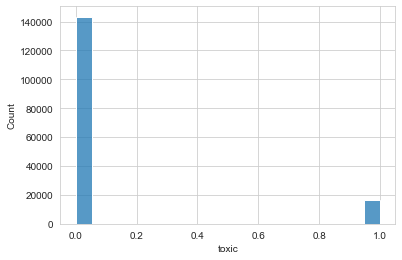

In [7]:
fig = sns.histplot(data=data['toxic'])
plt.show()

## Итоги первичного осмотра данных ##
1. пропущенные значения отсутствуют
2. классы несбаллансированны =>
    необходимо использовать параметр моделей ~class_weight = balanced, или провести баллансировку классов самостоятельно.
3. анализируемые тексты состоят из симфолов латиницы =>
    * регулярное выражение для очистки текстов от лишних символов должно состоять из латинских символов
    * в дальнейшем необходимо использовать BERT-base, multilingual

<a id='prepare'></a>
# Подготовка #

<a id='prepare_clear'></a>
## Очистка данных от лишних символов ##

<a id='prepare_clear_func'></a>
### Функция очистки данных ###

In [8]:
def data_clear(text):
    return re.sub(pattern='[^a-zA-Z ]',
                  repl=' ',
                  string=text.strip())

In [9]:
data['text'] = data['text'].apply(lambda x: data_clear(x))

<a id='prepare_feature_target'></a>

## Создание наборов features/target ##

In [10]:
features = data['text']
target = data['toxic']

<a id='prepare_train_test'><a/>
## Создание учебного/тестового наборов данных ##

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.3,
                                                                            random_state=state,
                                                                            shuffle=True)

<a id='prepare_class_balance'></a>
## Увеличение выборки ##

<a id='prepare_class_balance_func'></a>
### Функция увеличения выборки ###

In [12]:
def upsample_func(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=state)

    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample_func(features_train, target_train, 9)

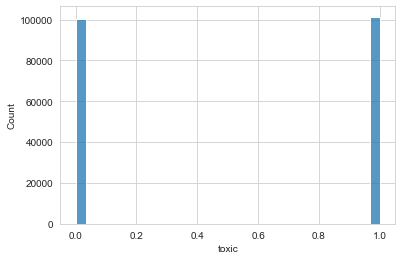

In [13]:
fig = sns.histplot(data=target_train_upsampled)
plt.show()

<a id='prepare_bert_init'></a>
## Инициализация модели BERT ##

In [14]:
config = transformers.BertConfig.from_json_file(json_file='bert/bert_config.json')
model = transformers.BertModel.from_pretrained('bert/pytorch_model.bin', config=config)

Some weights of the model checkpoint at bert/pytorch_model.bin were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<a id='prepare_tokenize'></a>
## Токенизация ##

In [15]:
tokenizer = transformers.BertTokenizer(
    vocab_file='bert/vocab.txt')

tokenized_train = features_train_upsampled.apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))

tokenized_test = features_test.apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))

<a id='prepare_padding'></a>
## Выравнивание длины токенов ##

<a id='get_tokenized_func'></a>
### Функция выравнивания длины токенов ###

In [16]:
def get_tokenized_func(tokenized):
    max_len = 0
    for i in tokenized.values:
        if len(i) > max_len:
            max_len = len(i)

    padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])
    attention_mask = np.where(padded != 0, 1, 0)
    return padded, attention_mask

<a id='prepare_embeddings'></a>
## Создние эмбеддингов ##

<a id='get_embeddings_func'></a>
### Функция создания эмбеддингов ###

In [17]:
def get_embeddings_func(padded, attention_mask):
    batch_size = 10
    embeddings = []

    for i in notebook.tqdm(range(padded.shape[0] // batch_size + 1)):

        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

        with torch.no_grad():
            batch_embeddings = model(batch.to(device), attention_mask=attention_mask_batch.to(device))

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())
    del batch
    del attention_mask_batch
    del batch_embeddings
    return embeddings

In [18]:
device = torch.device("cuda")
model.to(device)

padded_train, attention_mask_train = get_tokenized_func(tokenized_train)
padded_test, attention_mask_test = get_tokenized_func(tokenized_test)

features_train = np.concatenate(get_embeddings_func(padded_train, attention_mask_train))
features_test = np.concatenate(get_embeddings_func(padded_test, attention_mask_test))

  0%|          | 0/20186 [00:00<?, ?it/s]

  0%|          | 0/4788 [00:00<?, ?it/s]

<a id='hyperparams'></a>
# Гиперпараметры моделей #

<a id='hyperparams_grid_func'></a>
## Функция возвращающая набор гиперпараметров используемых моделей ##

In [19]:
def func_get_search_params(clf_name):
    params = {'XGBClassifier'          : {'max_depth'             : [10, 30, 50],
                                         #'min_child_weight'      : [1, 3, 6],
                                         'n_estimators'          : [200],
                                         'learning_rate'         : [0.05, 0.1, 0.16]
                                         },
              'LGBMClassifier'         : {'max_depth'             : [25, 50, 75],
                                         'learning_rate'         : [0.01, 0.05, 0.1],
                                         #'num_leaves'            : [300, 900, 1200],
                                         'n_estimators'          : [200]},
              'CatBoostClassifier'     : {'depth'                 : [4, 7, 10],
                                         'learning_rate'         : [0.03, 0.1, 0.15],
                                         'l2_leaf_reg'           : [1,4,9],
                                         'iterations'            : [300]},
              'DecisionTreeClassifier' : {#'splitter'              : ['best', 'random'],
                                         'max_depth'             : range(1, 21, 4),
                                         'min_samples_split'     : range(2,21,4),
                                         'min_samples_leaf'      : range(1,21,4),
                                         'max_features'          : ['auto']},
              'RandomForestClassifier' : {'n_estimators': range(1,21,4),
                                         #'criterion' : ['mse', 'mae'],
                                         'max_depth' : range(1, 21, 4),
                                         'min_samples_split' : range(2,21,4),
                                         'min_samples_leaf' : range(1,21,4),
                                         'max_features' : ['auto']}}
    return params[clf_name]

<a id='hyperparams_gridsearch_func'></a>
## Функция подбора гиперпараметров используемых моделей ##

In [20]:
def get_grid_params_func(clf):
    grid = GridSearchCV(clf,
                        param_grid=func_get_search_params(clf_name=type(clf).__name__),
                        scoring='f1',
                        n_jobs=6,
                        cv=5,
                        verbose=False)
    return grid

<a id='params_xgbc'></a>
## Подбор параметров XGBClassifier ##

In [21]:
clf_xgb = XGBClassifier(random_state=state)

grid = get_grid_params_func(clf=clf_xgb)

grid.fit(X=features_train,
         y=target_train_upsampled)

xgb_params = grid.best_params_

C:\Users\Marko\venv\venv3.8\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<a id='params_lgbmc'><a/>
## Подбор параметров LGBMClassifier ##

In [22]:
clf_lgbm = LGBMClassifier(random_state=state)

grid = get_grid_params_func(clf=clf_lgbm)

grid.fit(X=features_train,
         y=target_train_upsampled)

lgbm_params = grid.best_params_

<a id='params_cbc'></a>
## Подбор параметров CatBoostClassifier ##

In [23]:
clf_cbc = CatBoostClassifier(random_state=state, custom_metric='F1')
cbc_params = clf_cbc.grid_search(param_grid=func_get_search_params(clf_name=type(clf_cbc).__name__),
                                 X=features_train,
                                 y=target_train_upsampled)

0:	learn: 0.6832149	test: 0.6832052	best: 0.6832052 (0)	total: 248ms	remaining: 1m 14s
1:	learn: 0.6740288	test: 0.6739289	best: 0.6739289 (1)	total: 351ms	remaining: 52.3s
2:	learn: 0.6653105	test: 0.6651656	best: 0.6651656 (2)	total: 453ms	remaining: 44.9s
3:	learn: 0.6565700	test: 0.6563493	best: 0.6563493 (3)	total: 563ms	remaining: 41.7s
4:	learn: 0.6489444	test: 0.6487584	best: 0.6487584 (4)	total: 672ms	remaining: 39.6s
5:	learn: 0.6413287	test: 0.6410873	best: 0.6410873 (5)	total: 771ms	remaining: 37.8s
6:	learn: 0.6343063	test: 0.6339971	best: 0.6339971 (6)	total: 881ms	remaining: 36.9s
7:	learn: 0.6273601	test: 0.6269688	best: 0.6269688 (7)	total: 976ms	remaining: 35.6s
8:	learn: 0.6206194	test: 0.6201724	best: 0.6201724 (8)	total: 1.08s	remaining: 34.9s
9:	learn: 0.6145120	test: 0.6141168	best: 0.6141168 (9)	total: 1.19s	remaining: 34.5s
10:	learn: 0.6083993	test: 0.6079575	best: 0.6079575 (10)	total: 1.29s	remaining: 33.9s
11:	learn: 0.6025276	test: 0.6020060	best: 0.602006

<a id='params_dtc'></a>
## Подбор параметров DecisionTreeClassifier ##

In [24]:
clf_dtc = DecisionTreeClassifier(random_state=state)

grid = get_grid_params_func(clf=clf_dtc)

grid.fit(X=features_train,
         y=target_train_upsampled)

dtc_params = grid.best_params_

<a id='params_rfc'></a>
## Подбор параметров RandomForestClassifier ##

In [25]:
clf_rfc = RandomForestClassifier(random_state=state)

grid = get_grid_params_func(clf=clf_rfc)

grid.fit(X=features_train,
         y=target_train_upsampled)

rfc_params = grid.best_params_

<a id='predict'></a>
# Прогноз #

In [26]:
result = pd.DataFrame(columns=['Модель', 'F1 score', 'Время работы'])


<a id='predict_xgbclassifier'></a>
## Прогноз модели XGBClassifier ##

In [27]:
clf = XGBClassifier(random_state=state).set_params(**xgb_params)

clf.fit(X=features_train,
        y=target_train_upsampled)

start = time.time()
prediction = clf.predict(X=features_test)
end = time.time()

score = f1_score(y_true=target_test,
                 y_pred=prediction)
result = result.append({'Модель':type(clf).__name__,
                        'F1 score':score,
                        'Время работы': end - start}, ignore_index=True)

C:\Users\Marko\venv\venv3.8\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Marko\AppData\Local\Temp\ipykernel_3604\3415761707.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Модель':type(clf).__name__,


<a id='predict_lgbmclassifier'></a>
## Прогноз модели LGBMClassifier ##

In [28]:
clf = LGBMClassifier(random_state=state).set_params(**lgbm_params)

clf.fit(X=features_train,
             y=target_train_upsampled)

start = time.time()
prediction = clf.predict(X=features_test)
end = time.time()

score = f1_score(y_true=target_test,
                 y_pred=prediction)
result = result.append({'Модель':type(clf).__name__,
                        'F1 score':score,
                        'Время работы': end - start}, ignore_index=True)

C:\Users\Marko\AppData\Local\Temp\ipykernel_3604\405928325.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Модель':type(clf).__name__,


<a id='predict_cbclassifier'></a>
## Прогноз модели CatBoostClassifier ##

In [29]:
clf = CatBoostClassifier(random_state=state).set_params(**cbc_params.get('params'))

clf.fit(X=features_train,
            y=target_train_upsampled)

start = time.time()
prediction = clf.predict(data=features_test)
end = time.time()

score = f1_score(y_true=target_test,
                 y_pred=prediction)

result = result.append({'Модель':type(clf).__name__,
                        'F1 score':score,
                        'Время работы': end - start}, ignore_index=True)

0:	learn: 0.6174476	total: 1.93s	remaining: 9m 37s
1:	learn: 0.5607582	total: 3.86s	remaining: 9m 35s
2:	learn: 0.5183682	total: 5.67s	remaining: 9m 21s
3:	learn: 0.4848060	total: 7.63s	remaining: 9m 24s
4:	learn: 0.4626380	total: 9.34s	remaining: 9m 10s
5:	learn: 0.4441255	total: 11.1s	remaining: 9m 4s
6:	learn: 0.4288175	total: 12.9s	remaining: 8m 58s
7:	learn: 0.4161457	total: 14.7s	remaining: 8m 56s
8:	learn: 0.4035776	total: 16.5s	remaining: 8m 52s
9:	learn: 0.3936415	total: 18.2s	remaining: 8m 48s
10:	learn: 0.3841652	total: 20s	remaining: 8m 46s
11:	learn: 0.3752308	total: 22s	remaining: 8m 47s
12:	learn: 0.3670731	total: 23.8s	remaining: 8m 44s
13:	learn: 0.3615384	total: 25.4s	remaining: 8m 39s
14:	learn: 0.3547216	total: 27.2s	remaining: 8m 36s
15:	learn: 0.3489848	total: 29s	remaining: 8m 34s
16:	learn: 0.3440160	total: 30.7s	remaining: 8m 30s
17:	learn: 0.3372980	total: 32.4s	remaining: 8m 28s
18:	learn: 0.3323137	total: 34.3s	remaining: 8m 27s
19:	learn: 0.3275210	total: 3

C:\Users\Marko\AppData\Local\Temp\ipykernel_3604\1238375872.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Модель':type(clf).__name__,


<a id='predict_dtclassifier'></a>
## Прогноз модели DecisionTreeClassifier ##

In [30]:
clf = DecisionTreeClassifier(random_state=state).set_params(**dtc_params)

clf.fit(X=features_train,
            y=target_train_upsampled)

start = time.time()
prediction = clf.predict(X=features_test)
end = time.time()

score = f1_score(y_true=target_test,
                 y_pred=prediction)

result = result.append({'Модель':type(clf).__name__,
                        'F1 score':score,
                        'Время работы': end - start}, ignore_index=True)

C:\Users\Marko\AppData\Local\Temp\ipykernel_3604\192396924.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Модель':type(clf).__name__,


<a id='predict_rfclassifier'></a>
## Прогноз модели RandomForestClassifier ##

In [31]:
clf = RandomForestClassifier(random_state=state).set_params(**rfc_params)

clf.fit(X=features_train,
            y=target_train_upsampled)

start = time.time()
prediction = clf.predict(X=features_test)
end = time.time()

score = f1_score(y_true=target_test,
                 y_pred=prediction)

result = result.append({'Модель':type(clf).__name__,
                        'F1 score':score,
                        'Время работы': end - start}, ignore_index=True)

C:\Users\Marko\AppData\Local\Temp\ipykernel_3604\3913677373.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Модель':type(clf).__name__,


<a id='predict_log_regression'></a>
## Прогноз модели LogisticRegression ##

In [32]:
clf = LogisticRegression()

clf.fit(X=features_train,
        y=target_train_upsampled)

start = time.time()
prediction = clf.predict(X=features_test)
end = time.time()

score = f1_score(y_true=target_test,
                 y_pred=prediction)
result = result.append({'Модель':type(clf).__name__,
                        'F1 score':score,
                        'Время работы': end - start}, ignore_index=True)

C:\Users\Marko\venv\venv3.8\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marko\AppData\Local\Temp\ipykernel_3604\711303486.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Модель':type(clf).__name__,


In [33]:
display(result)

,Модель,F1 score,Время работы
0,XGBClassifier,0.581987,0.230383
1,LGBMClassifier,0.581732,0.106715
2,CatBoostClassifier,0.604964,0.672884
3,DecisionTreeClassifier,0.400849,0.045879
4,RandomForestClassifier,0.543089,0.283247
5,LogisticRegression,0.561586,0.107711


# Вывод #
С использованием приема балансировки классов - upsampling удалось добиться заданного значения метрики F1 для всех представленных моделей.
Наивысшие значения метрики достигнуты для моделей:
* XGBClassifier
* CatBoostClassifier
